## Task 2 Data Exploration with python

### a) Perform Exploratory data analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("wholesalegasolineprices.csv")

# Overview of the dataset
print(df.head())
print(df.info())
print(df.describe())


        Date  Day-of Toronto Wholesale Gasoline  Prior Day NY Harbor Spot  \
0  6/25/2018                               83.5                       NaN   
1  6/26/2018                               82.8                      70.3   
2  6/27/2018                               83.4                      70.9   
3  6/28/2018                               85.6                      72.6   
4  6/29/2018                               85.3                      72.6   

   Day-of Toronto less Prior Day NY Harbor  \
0                                      NaN   
1                                     12.5   
2                                     12.5   
3                                     13.0   
4                                     12.7   

   Day-of Thunder Bay Wholesale Gasoline  Prior Day Edmonton Spot  \
0                                    0.0                      NaN   
1                                    0.0                      0.0   
2                                    0.0             

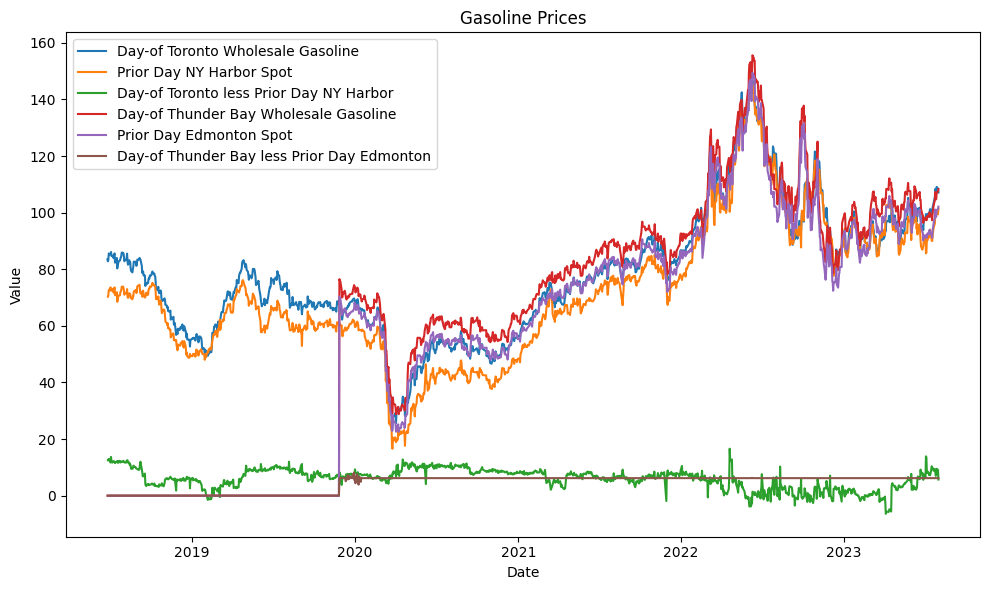

In [3]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plot each column as a separate line chart
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Day-of Toronto Wholesale Gasoline'], label='Day-of Toronto Wholesale Gasoline')
plt.plot(df['Date'], df['Prior Day NY Harbor Spot'], label='Prior Day NY Harbor Spot')
plt.plot(df['Date'], df['Day-of Toronto less Prior Day NY Harbor'], label='Day-of Toronto less Prior Day NY Harbor')
plt.plot(df['Date'], df['Day-of Thunder Bay Wholesale Gasoline'], label='Day-of Thunder Bay Wholesale Gasoline')
plt.plot(df['Date'], df['Prior Day Edmonton Spot'], label='Prior Day Edmonton Spot')
plt.plot(df['Date'], df['Day-of Thunder Bay less Prior Day Edmonton'], label='Day-of Thunder Bay less Prior Day Edmonton')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Gasoline Prices')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

### b) Generate summary stats

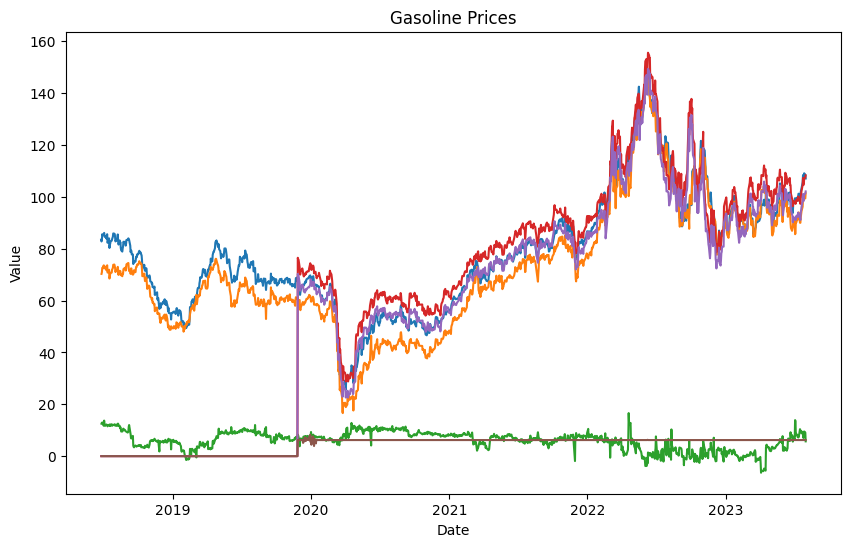

Summary Statistics:
       Day-of Toronto Wholesale Gasoline  Prior Day NY Harbor Spot  \
count                        1297.000000               1296.000000   
mean                           77.759445                 71.744753   
std                            22.199763                 24.134664   
min                            23.300000                 16.600000   
25%                            62.700000                 56.600000   
50%                            76.300000                 68.900000   
75%                            91.100000                 88.900000   
max                           146.700000                149.700000   

       Day-of Toronto less Prior Day NY Harbor  \
count                              1296.000000   
mean                                  6.010262   
std                                   3.578425   
min                                  -6.400000   
25%                                   3.600000   
50%                                   6.600000   

In [4]:
# Generate summary statistics
summary_stats = df.describe()

# Identify data types
data_types = df.dtypes

# Visualize data distribution
plt.figure(figsize=(10, 6))
for column in df.columns[1:]:
    plt.plot(df['Date'], df[column], label=column)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Gasoline Prices')
plt.show()

print("Summary Statistics:")
print(summary_stats)
print("\nData Types:")
print(data_types)


## Task 3 Data preprocessing with python

### a) Preprocess

In [5]:
'''
plt.figure(figsize=(10, 6))
for i, column in enumerate(df.columns[1:], 1):
    plt.subplot(2, 3, i)
    plt.bar(df['Date'], df[column])
    plt.xlabel('Date')
    plt.ylabel(column)

plt.tight_layout()
plt.show()
'''

"\nplt.figure(figsize=(10, 6))\nfor i, column in enumerate(df.columns[1:], 1):\n    plt.subplot(2, 3, i)\n    plt.bar(df['Date'], df[column])\n    plt.xlabel('Date')\n    plt.ylabel(column)\n\nplt.tight_layout()\nplt.show()\n"

### b) Handle Missing values, Outliers, and Perform

In [6]:

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the DataFrame index
df.set_index('Date', inplace=True)

df = df.fillna(0)

threshold = df.quantile(0.99)
df = df.clip(upper=threshold, axis=1)

df['Diff_Toronto_and_NY'] = df['Day-of Toronto Wholesale Gasoline'] - df['Prior Day NY Harbor Spot']
df['Diff_Toronto_and_ThunderBay'] = df['Day-of Toronto less Prior Day NY Harbor'] - df['Day-of Thunder Bay Wholesale Gasoline']
df['Diff_Edmonton_and_ThunderBay'] = df['Day-of Thunder Bay less Prior Day Edmonton'] - df['Prior Day Edmonton Spot']

In [7]:
df.head(10)

,Day-of Toronto Wholesale Gasoline,Prior Day NY Harbor Spot,Day-of Toronto less Prior Day NY Harbor,Day-of Thunder Bay Wholesale Gasoline,Prior Day Edmonton Spot,Day-of Thunder Bay less Prior Day Edmonton,Diff_Toronto_and_NY,Diff_Toronto_and_ThunderBay,Diff_Edmonton_and_ThunderBay
Date,,,,,,,,,
2018-06-25,83.5,0.0,0.000,0.0,0.0,0.0,83.5,0.000,0.0
2018-06-26,82.8,70.3,12.404,0.0,0.0,0.0,12.5,12.404,0.0
2018-06-27,83.4,70.9,12.404,0.0,0.0,0.0,12.5,12.404,0.0
2018-06-28,85.6,72.6,12.404,0.0,0.0,0.0,13.0,12.404,0.0
2018-06-29,85.3,72.6,12.404,0.0,0.0,0.0,12.7,12.404,0.0
2018-07-02,85.3,73.6,11.700,0.0,0.0,0.0,11.7,11.700,0.0
2018-07-03,86.1,72.4,12.404,0.0,0.0,0.0,13.7,12.404,0.0
2018-07-04,84.7,72.7,12.000,0.0,0.0,0.0,12.0,12.000,0.0
2018-07-05,84.7,72.6,12.100,0.0,0.0,0.0,12.1,12.100,0.0


## Task 4 Implement Machine learning models with python

### a) Two machine learning models

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Split the data into features (X) and target (y)
X = df.drop(columns=['Day-of Toronto Wholesale Gasoline'])
y = df['Day-of Toronto Wholesale Gasoline']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Model 2: Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate Model Performance
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Compare the performance of the models
print("Linear Regression:")
print(f"Mean Squared Error: {lr_mse:.2f}")
print(f"R-squared: {lr_r2:.2f}")

print("\nRandom Forest Regression:")
print(f"Mean Squared Error: {rf_mse:.2f}")
print(f"R-squared: {rf_r2:.2f}")




Linear Regression:
Mean Squared Error: 0.00
R-squared: 1.00

Random Forest Regression:
Mean Squared Error: 1.17
R-squared: 1.00


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

X = df.drop(columns=['Day-of Toronto Wholesale Gasoline'])
y = df['Day-of Toronto Wholesale Gasoline']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

cr = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(cr)


<class 'ValueError'>: Unknown label type: 'continuous'

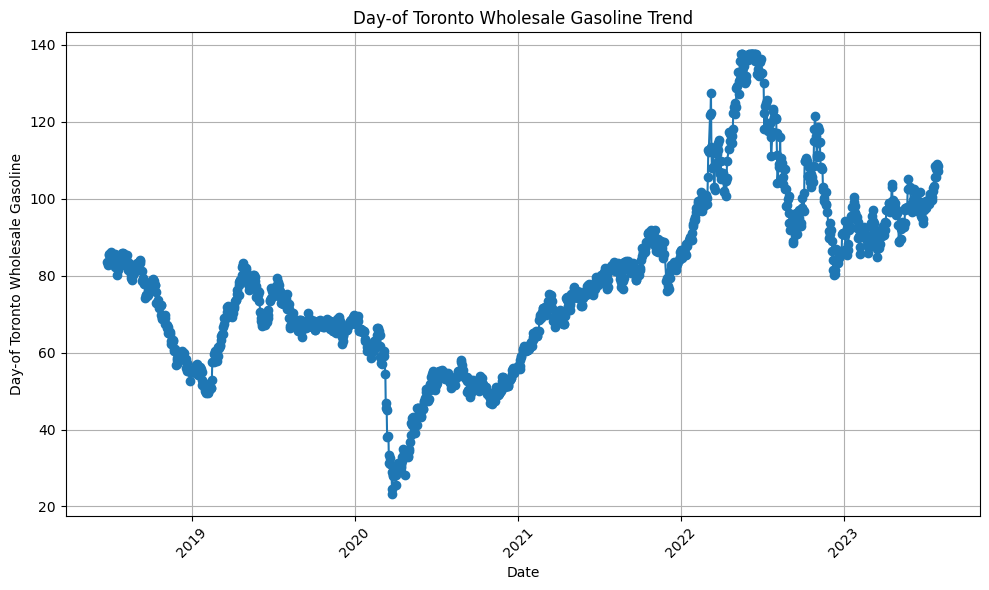

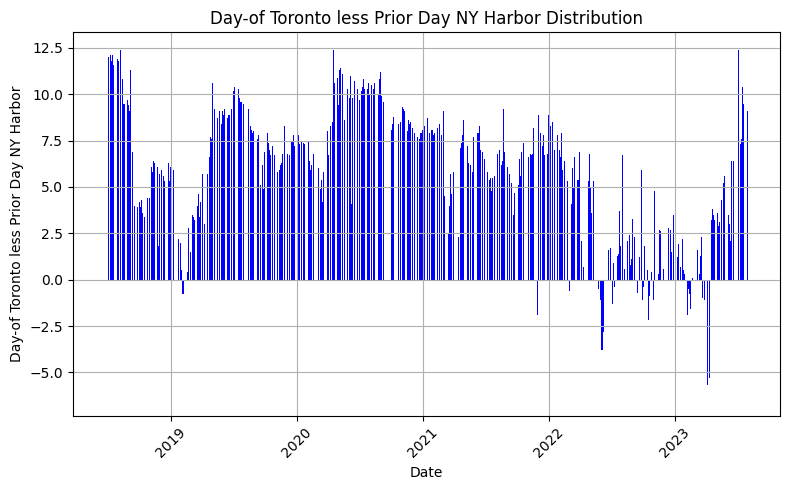

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Line Plot: Day-of Toronto Wholesale Gasoline
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Day-of Toronto Wholesale Gasoline'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Day-of Toronto Wholesale Gasoline')
plt.title('Day-of Toronto Wholesale Gasoline Trend')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar Chart: Day-of Toronto less Prior Day NY Harbor
plt.figure(figsize=(8, 5))
plt.bar(df.index, df['Day-of Toronto less Prior Day NY Harbor'], color='blue')
plt.xlabel('Date')
plt.ylabel('Day-of Toronto less Prior Day NY Harbor')
plt.title('Day-of Toronto less Prior Day NY Harbor Distribution')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## b)  Evaluate two models

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Preprocessing (if necessary)

# Split the data into features (X) and target (y)
X = df.drop(columns=['Day-of Toronto Wholesale Gasoline'])
y = df['Day-of Toronto Wholesale Gasoline']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Model 2: Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate Model Performance
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Compare the performance of the models
print("Linear Regression:")
print(f"Mean Squared Error: {lr_mse:.2f}")
print(f"R-squared: {lr_r2:.2f}")

print("\nRandom Forest Regression:")
print(f"Mean Squared Error: {rf_mse:.2f}")
print(f"R-squared: {rf_r2:.2f}")


Linear Regression:
Mean Squared Error: 0.00
R-squared: 1.00

Random Forest Regression:
Mean Squared Error: 1.17
R-squared: 1.00


## Task 5  Data Visualization

### 5.1  Create Meaningfull plots

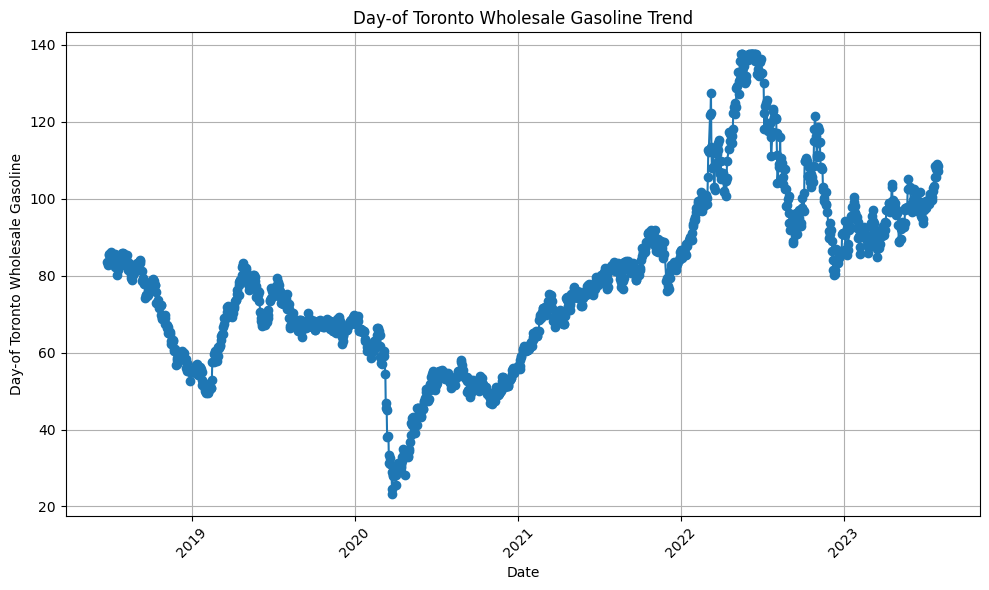

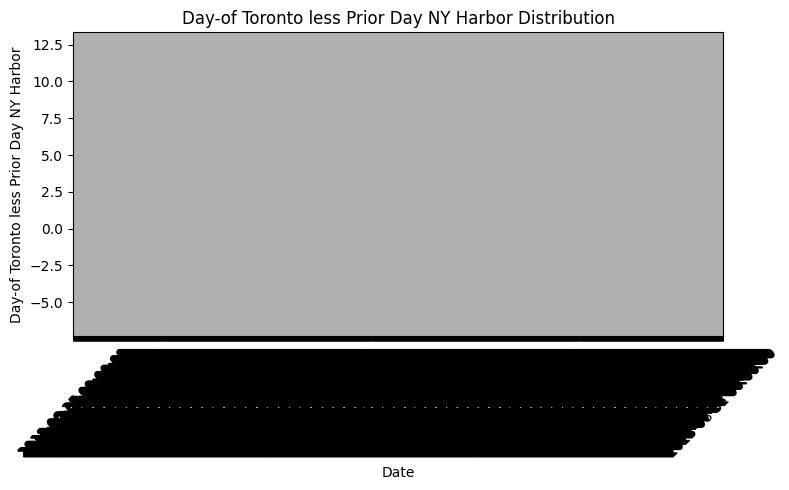

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Line Plot: Day-of Toronto Wholesale Gasoline
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Day-of Toronto Wholesale Gasoline'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Day-of Toronto Wholesale Gasoline')
plt.title('Day-of Toronto Wholesale Gasoline Trend')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar Chart: Day-of Toronto less Prior Day NY Harbor
plt.figure(figsize=(8, 5))
sns.barplot(x=df.index, y=df['Day-of Toronto less Prior Day NY Harbor'], color='blue')
plt.xlabel('Date')
plt.ylabel('Day-of Toronto less Prior Day NY Harbor')
plt.title('Day-of Toronto less Prior Day NY Harbor Distribution')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


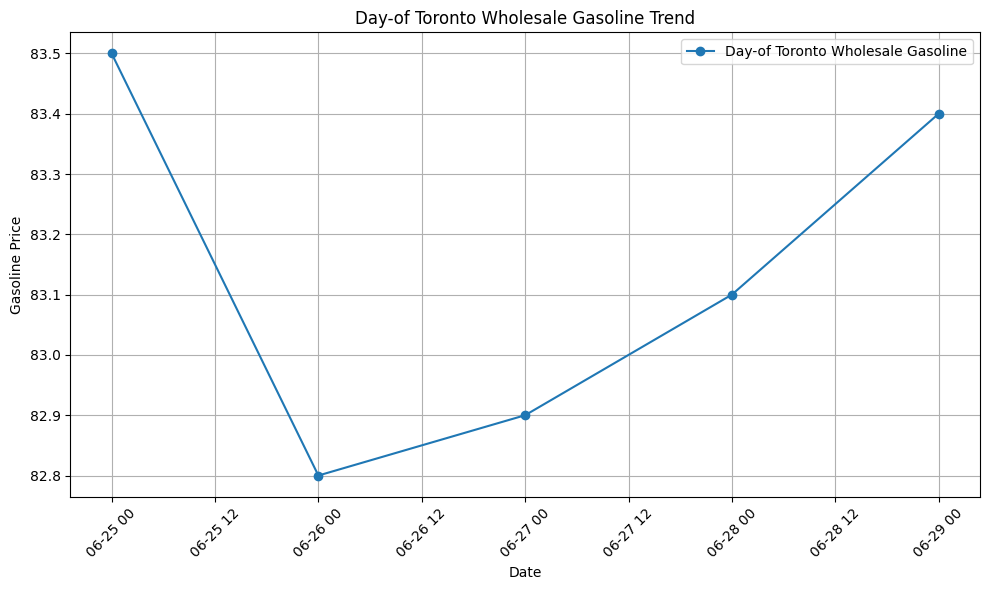

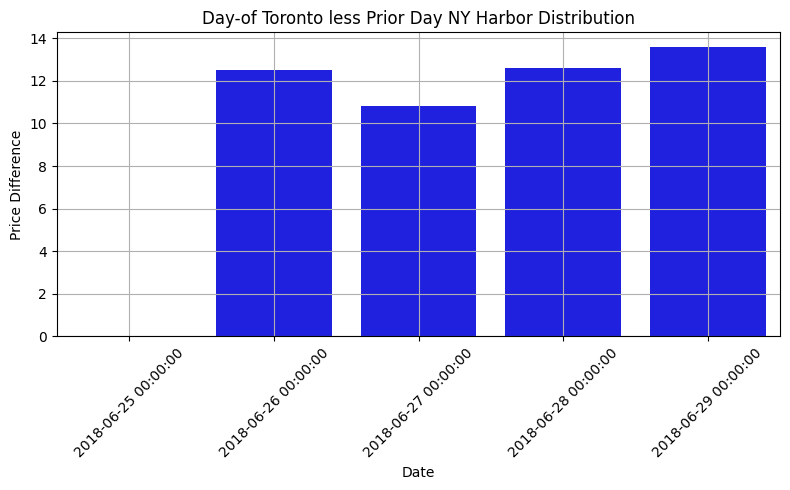

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = {
    'Date': ['6/25/2018', '6/26/2018', '6/27/2018', '6/28/2018', '6/29/2018'],
    'Day-of Toronto Wholesale Gasoline': [83.5, 82.8, 82.9, 83.1, 83.4],
    'Prior Day NY Harbor Spot': [0, 70.3, 72.1, 70.5, 69.8],
    'Day-of Toronto less Prior Day NY Harbor': [0, 12.5, 10.8, 12.6, 13.6],
    'Day-of Thunder Bay Wholesale Gasoline': [0, 0, 0, 0, 0],
    'Prior Day Edmonton Spot': [0, 0, 0, 0, 0],
    'Day-of Thunder Bay less Prior Day Edmonton': [0, 0, 0, 0, 0]
}

# Create DataFrame from the data
df = pd.DataFrame(data)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the DataFrame index
df.set_index('Date', inplace=True)

# Line Plot: Day-of Toronto Wholesale Gasoline
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Day-of Toronto Wholesale Gasoline'], marker='o', linestyle='-', label='Day-of Toronto Wholesale Gasoline')
plt.xlabel('Date')
plt.ylabel('Gasoline Price')
plt.title('Day-of Toronto Wholesale Gasoline Trend')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar Chart: Day-of Toronto less Prior Day NY Harbor
plt.figure(figsize=(8, 5))
sns.barplot(x=df.index, y=df['Day-of Toronto less Prior Day NY Harbor'], color='blue')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.title('Day-of Toronto less Prior Day NY Harbor Distribution')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
